In [1]:
print("Hello")

Hello


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import psycopg2
import getpass

In [4]:
%matplotlib inline
plt.style.use('ggplot') 

In [5]:
# Create a database connection
user = 'postgres'
password = 'master'
host = 'localhost'
dbname = 'mimic'
schema = 'mimiciii'

In [6]:
# Connect to the database
con = psycopg2.connect(dbname=dbname, user=user, host=host, 
                       password=password)
cur = con.cursor()
cur.execute('SET search_path to {}'.format(schema))

In [7]:
# Get length of stay from the icustays table
query = \
"""
select diagnosis, count(*) as count
from mimiciii.admissions
where admission_type not like 'NEWBORN'
group by diagnosis
order by count desc
limit 20
"""

data = pd.read_sql_query(query,con)

In [8]:
# Display the first few rows of the data
data.head(30)

,diagnosis,count
0,PNEUMONIA,1566
1,SEPSIS,1184
2,CONGESTIVE HEART FAILURE,928
3,CORONARY ARTERY DISEASE,840
4,CHEST PAIN,778
5,INTRACRANIAL HEMORRHAGE,713
6,ALTERED MENTAL STATUS,712
7,GASTROINTESTINAL BLEED,686
8,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,583
9,UPPER GI BLEED,580


In [9]:
#data.set_index('diagnosis').count().plot.barh(figsize=(5, 5), color='blue')

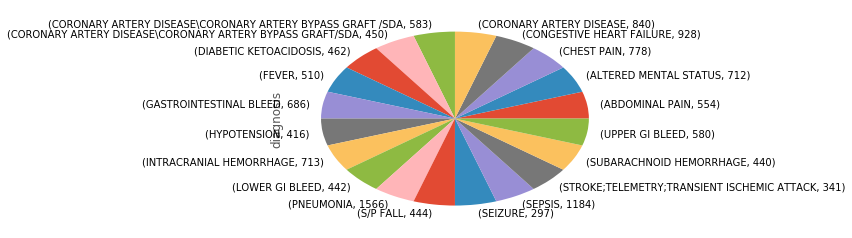

In [10]:
# Plot the distribution

#diagnoses = data.groupby(['diagnosis', 'count']).diagnosis.count().plot.barh()

diagnoses = data.groupby(['diagnosis', 'count']).diagnosis.count().plot.pie()

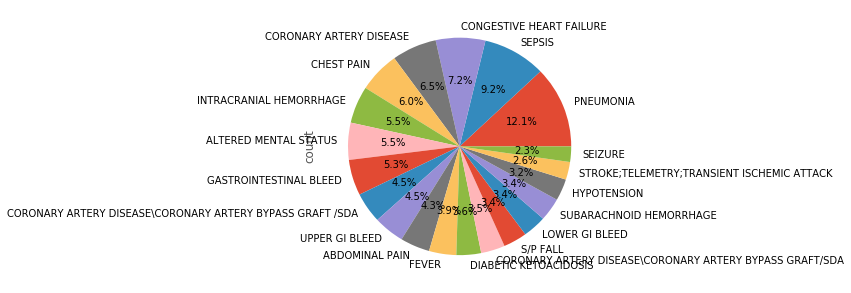

In [11]:
plot = data.plot.pie(y='count', figsize=(5, 5), legend=False, labels=data.diagnosis, autopct='%1.1f%%')

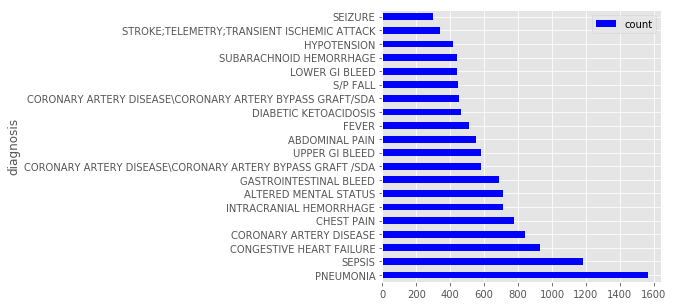

In [12]:
diagnoses = data.set_index('diagnosis').plot.barh(y='count', figsize=(5, 5), color='blue')

In [13]:
Total = sum(data['count'])
print Total

12926
